In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from scipy import stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,5)
pd.set_option('display.max_columns', None)

In [7]:
# load the wildfire climate data
fire_climate_df = pd.read_csv(r'D:\yeshiva\2 semester\math\final\data\California_Fire_nearest_climate.csv')
fire_climate_df.shape

(164, 24)

In [8]:
fire_climate_df.describe()

,LATITUDE,LONGITUDE,ELEVATION,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT10,WT11,fire_flag
count,164.000000,164.000000,164.000000,164.000000,163.000000,164.000000,161.000000,164.000000,162.000000,164.000000,162.000000,41.0,7.0,1.0,0.0,3.0,24.0,19.0,0.0,0.0,164.0
mean,33.527316,-117.066355,210.843293,5.998293,0.001472,90.542683,62.155280,262.926829,254.320988,18.041463,23.856173,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0
std,0.508569,0.510017,96.805771,2.464238,0.018798,13.119250,8.743254,62.924393,71.790556,4.680109,6.362379,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0
min,32.572220,-117.438610,100.000000,2.460000,0.000000,61.000000,44.000000,20.000000,10.000000,8.900000,12.100000,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0
25%,33.105420,-117.438610,124.700000,4.700000,0.000000,79.750000,57.000000,260.000000,252.500000,14.775000,19.000000,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0
50%,33.822200,-117.279440,245.200000,5.370000,0.000000,92.000000,62.000000,270.000000,270.000000,17.000000,23.000000,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0
75%,33.951940,-116.915830,245.200000,6.317500,0.000000,98.000000,67.000000,280.000000,280.000000,21.000000,27.100000,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0
max,33.951940,-114.714200,424.600000,15.430000,0.240000,119.000000,91.000000,360.000000,360.000000,35.100000,46.100000,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0


In [9]:
# load the no wildfire climate data
no_fire_climate_df = pd.read_csv(r'D:\yeshiva\2 semester\math\final\data\California_No_Fire_nearest_climate.csv')
no_fire_climate_df.shape

(9697, 24)

In [10]:
no_fire_climate_df.describe()

,LATITUDE,LONGITUDE,ELEVATION,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT10,WT11,fire_flag
count,9697.000000,9697.000000,9697.000000,9684.000000,9579.000000,9669.000000,9668.000000,9691.000000,9575.000000,9691.000000,9575.000000,2848.0,673.0,142.0,0.0,7.0,375.0,1599.0,1.0,0.0,9697.0
mean,33.148265,-116.813357,144.838940,5.645270,0.027026,77.348640,56.602400,255.257455,251.936188,15.506202,20.147655,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,0.0
std,0.486285,0.787800,120.340533,2.509551,0.168245,13.184968,10.840196,67.703927,70.492557,4.787385,6.263057,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0
min,32.572220,-117.438610,4.600000,0.670000,0.000000,47.000000,23.000000,10.000000,10.000000,4.900000,6.900000,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,0.0
25%,32.733600,-117.200000,100.000000,4.030000,0.000000,68.000000,49.000000,240.000000,230.000000,13.000000,16.100000,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,0.0
50%,33.037500,-117.139440,124.700000,5.140000,0.000000,75.000000,56.000000,270.000000,270.000000,14.100000,19.000000,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,0.0
75%,33.618600,-116.915830,157.000000,6.710000,0.000000,84.000000,63.000000,300.000000,300.000000,17.000000,23.000000,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,0.0
max,33.951940,-114.714200,424.600000,53.020000,5.050000,122.000000,95.000000,360.000000,360.000000,48.100000,66.000000,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,0.0


In [11]:
# select no fire climate data randomly
random_no_fire_climate_df = no_fire_climate_df.sample(n=164)
random_no_fire_climate_df

,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT10,WT11,County,fire_flag
7857,"RIVERSIDE MUNICIPAL AIRPORT, CA US",33.95194,-117.43861,245.2,2017-11-11,2.68,0.0,75.0,49.0,270.0,270.0,13.0,15.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,Riverside,0
5147,"SAN DIEGO MONTGOMERY FIELD, CA US",32.81583,-117.13944,127.1,2019-03-27,6.71,0.0,69.0,53.0,310.0,310.0,14.1,18.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,San Diego,0
3155,"SAN DIEGO BROWN FIELD, CA US",32.57222,-116.97944,157.0,2019-10-02,4.70,0.0,75.0,48.0,280.0,280.0,13.0,18.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,San Diego,0
7143,"PALM SPRINGS ASOS, CA US",33.82220,-116.50430,124.7,2018-10-22,4.70,0.0,91.0,65.0,330.0,120.0,13.0,16.1,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,Riverside,0
873,"CARLSBAD MCCLELLAN PALOMAR AIRPORT, CA US",33.12806,-117.27944,100.0,2019-06-08,5.59,0.0,68.0,61.0,240.0,260.0,12.1,17.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,San Diego,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6414,"RAMONA AIRPORT, CA US",33.03750,-116.91583,424.6,2019-10-03,3.80,0.0,84.0,43.0,270.0,240.0,13.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,San Diego,0
7529,"PALM SPRINGS ASOS, CA US",33.82220,-116.50430,124.7,2019-11-21,3.36,0.0,68.0,50.0,140.0,140.0,8.9,12.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Riverside,0
2402,"SAN DIEGO BROWN FIELD, CA US",32.57222,-116.97944,157.0,2017-08-24,4.47,0.0,70.0,64.0,280.0,290.0,8.9,13.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,San Diego,0
8754,"BLYTHE ASOS, CA US",33.61860,-114.71420,120.4,2017-05-29,6.49,0.0,105.0,70.0,240.0,240.0,16.1,25.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Riverside,0


In [12]:
# merge the two dataset together
merged_two_pd = pd.concat([fire_climate_df, random_no_fire_climate_df])
merged_two_pd.shape

(328, 24)

variable         | description
---------------- | -----------
`ELEVATION`      | elevation is above mean sea level (tenths of meters)
`AWND`           | Average daily wind speed (meters per second or miles per hour as per user preference)

# Exploring the data TODO

# Simple linear regression

- select ELEVATION and fire_flag to run the Simple linear regression

# Exploring the data for Simple linear regression

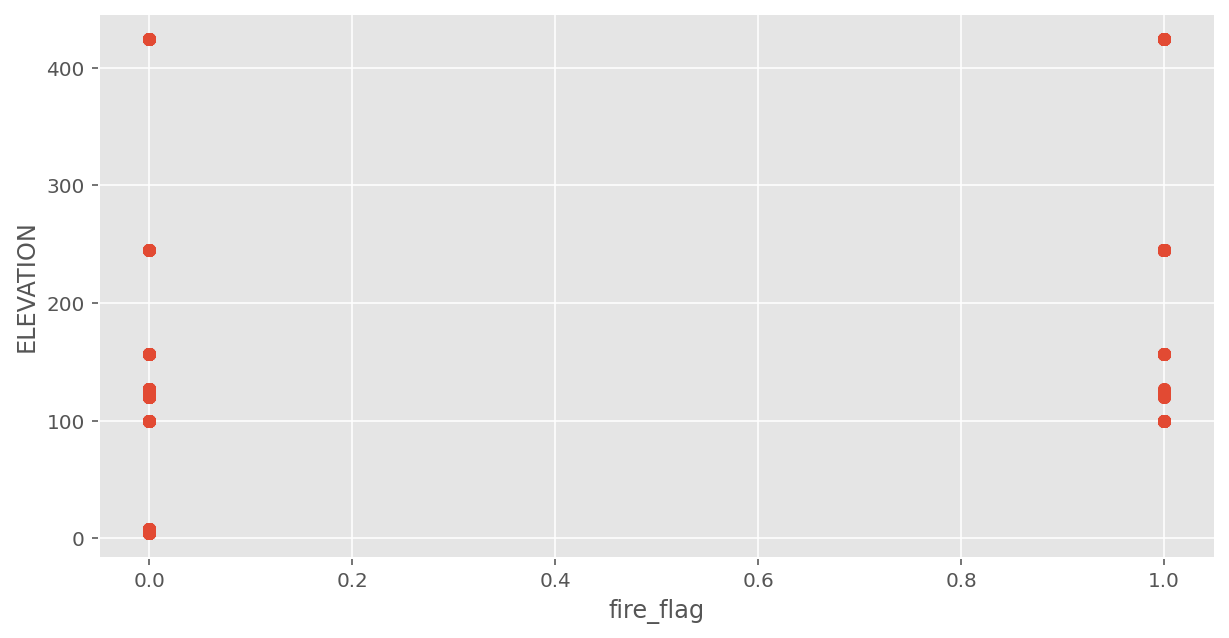

In [13]:
plt.scatter(merged_two_pd.fire_flag, merged_two_pd.ELEVATION)
plt.xlabel('fire_flag')
plt.ylabel('ELEVATION')
plt.show();

<Figure size 576x432 with 0 Axes>

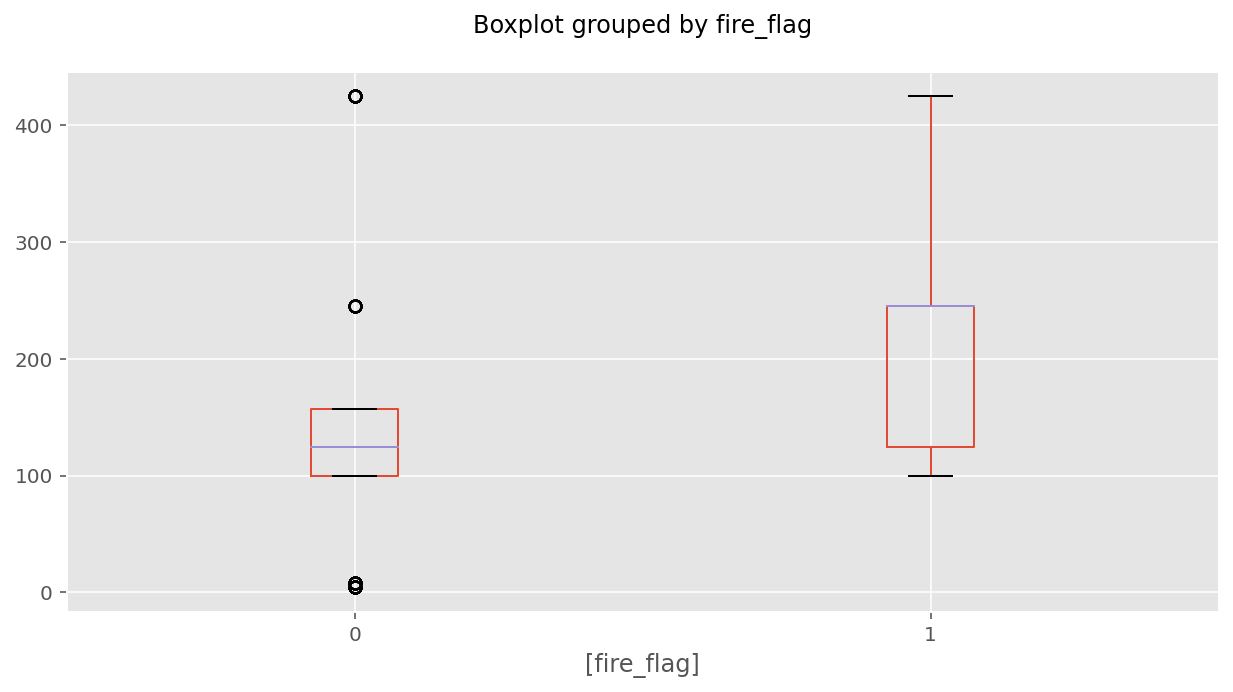

In [26]:
# Using box plot to show the AcresBurned
fig = plt.figure(figsize=(8, 6))
# sns.catplot(x="fire_flag", y="ELEVATION", kind="box", data=merged_two_pd)
boxplot = merged_two_pd[['ELEVATION', 'fire_flag']].boxplot(by='fire_flag')
plt.title("")
plt.show()

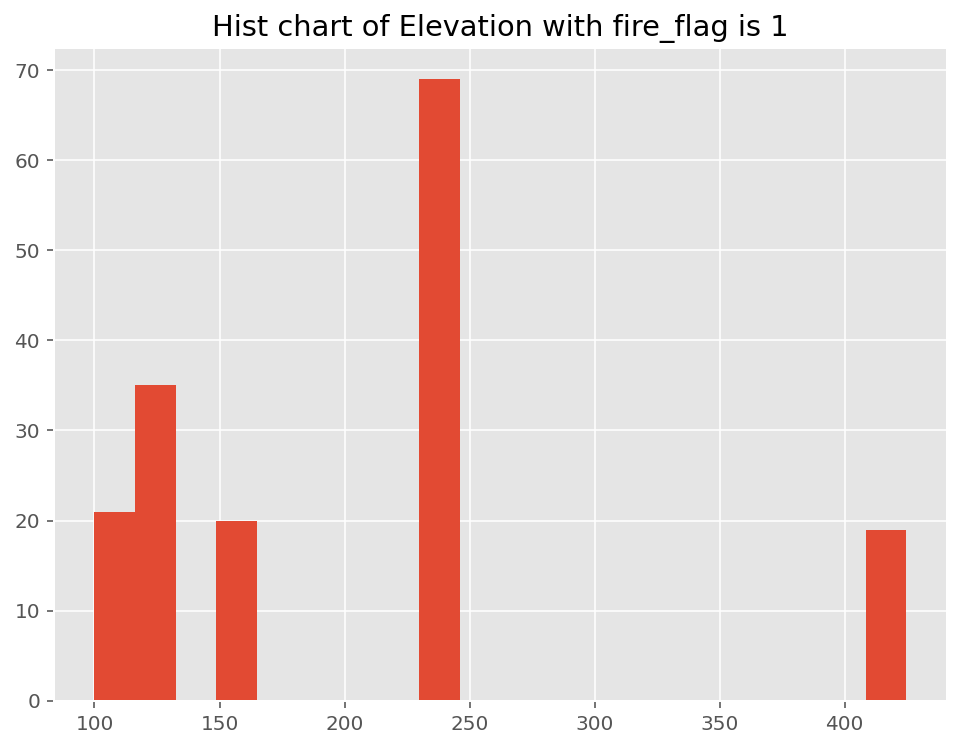

In [25]:
fig = plt.figure(figsize=(8, 6))
# sns.catplot(x="fire_flag", y="ELEVATION", kind="box", data=merged_two_pd)
hist = merged_two_pd[merged_two_pd['fire_flag'] == 1]['ELEVATION'].hist(bins=20)
plt.title("Hist chart of Elevation with fire_flag is 1")
plt.show()

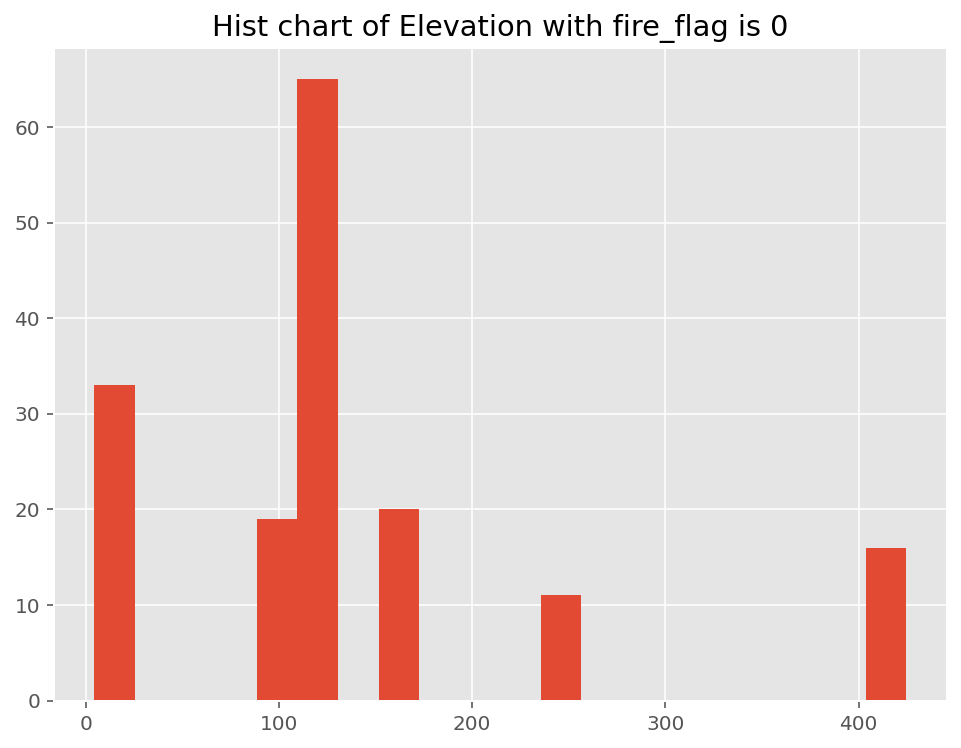

In [27]:
fig = plt.figure(figsize=(8, 6))
# sns.catplot(x="fire_flag", y="ELEVATION", kind="box", data=merged_two_pd)
hist = merged_two_pd[merged_two_pd['fire_flag'] == 0]['ELEVATION'].hist(bins=20)
plt.title("Hist chart of Elevation with fire_flag is 0")
plt.show()

In [34]:
lr_model = LinearRegression()
x_arr = merged_two_pd['ELEVATION'].to_numpy().reshape(-1, 1)
y_arr = merged_two_pd['fire_flag'].to_numpy().reshape(-1, 1)

lr_model.fit(x_arr, y_arr)

LinearRegression()

In [39]:
lr_model.summary()

AttributeError: 'LinearRegression' object has no attribute 'summary'

In [35]:
y_predict = lr_model.predict(x_arr)
print(y_predict)

[[0.4263053 ]
 [0.39006783]
 [0.60309135]
 [0.47369277]
 [0.60309135]
 [0.39006783]
 [0.60309135]
 [0.39006783]
 [0.60309135]
 [0.4263053 ]
 [0.39006783]
 [0.86628982]
 [0.60309135]
 [0.86628982]
 [0.60309135]
 [0.47369277]
 [0.60309135]
 [0.60309135]
 [0.60309135]
 [0.47369277]
 [0.60309135]
 [0.60309135]
 [0.4263053 ]
 [0.47369277]
 [0.4263053 ]
 [0.60309135]
 [0.39006783]
 [0.60309135]
 [0.60309135]
 [0.86628982]
 [0.60309135]
 [0.60309135]
 [0.39006783]
 [0.4263053 ]
 [0.60309135]
 [0.60309135]
 [0.60309135]
 [0.4263053 ]
 [0.86628982]
 [0.60309135]
 [0.60309135]
 [0.60309135]
 [0.60309135]
 [0.60309135]
 [0.4263053 ]
 [0.60309135]
 [0.60309135]
 [0.60309135]
 [0.4263053 ]
 [0.60309135]
 [0.4263053 ]
 [0.86628982]
 [0.47369277]
 [0.47369277]
 [0.47369277]
 [0.39006783]
 [0.4263053 ]
 [0.4263053 ]
 [0.60309135]
 [0.60309135]
 [0.4263053 ]
 [0.60309135]
 [0.41999676]
 [0.60309135]
 [0.60309135]
 [0.60309135]
 [0.60309135]
 [0.60309135]
 [0.60309135]
 [0.4263053 ]
 [0.60309135]
 [0.39

In [37]:
print(y_arr)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
